# Fabian Munoz Aguirre - A00354910
## Profesor: Dra. María de la Paz Rico Fernández
### Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [189]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(17)

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [190]:
#np.random.rand(100, 1)

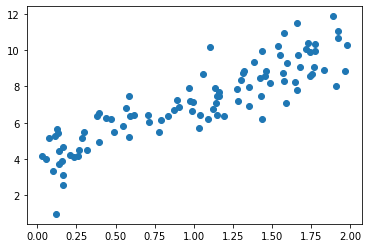

In [191]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [192]:
import pandas as pd
pd.DataFrame(y)

,0
0,5.227010
1,8.707938
2,6.357510
3,4.458679
4,8.295282
...,...
95,3.868815
96,9.914778
97,8.460604
98,8.860730


In [193]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [194]:
#X_fit[]

In [195]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

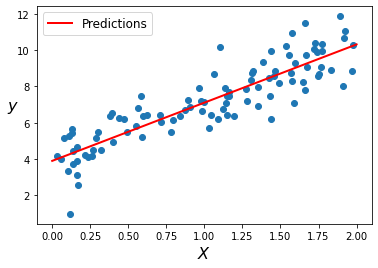

In [196]:
plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.legend(loc="upper left", fontsize=12);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [197]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [198]:
X_new.shape

(2, 1)

In [199]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.89053611],
       [10.3250168 ]])

In [200]:
linear_reg.coef_, linear_reg.intercept_

(array([[3.21724034]]), array([3.89053611]))

The model estimates:

$\hat{y} = 2.99X + 4.03$

In [201]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [202]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

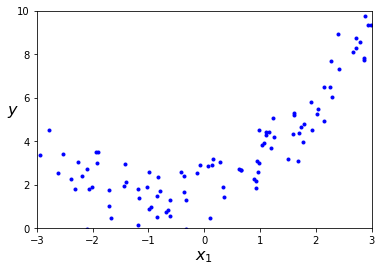

In [203]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.axis([-3, 3, 0, 10]);

In [204]:
import pandas as pd
pd.DataFrame(y)

,0
0,2.734754
1,5.480022
2,3.508933
3,0.829541
4,0.503377
...,...
95,1.848646
96,4.795762
97,3.026694
98,1.373647


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [205]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [206]:
X_poly

array([[-2.09507589e+00,  4.38934300e+00],
       [ 2.03971104e+00,  4.16042113e+00],
       [-1.90429344e+00,  3.62633349e+00],
       [-6.53379680e-01,  4.26905006e-01],
       [-8.38781539e-01,  7.03554471e-01],
       [-6.12347022e-01,  3.74968875e-01],
       [ 2.94130113e+00,  8.65125235e+00],
       [-1.80754450e+00,  3.26721711e+00],
       [-7.84480139e-01,  6.15409088e-01],
       [ 1.61636535e+00,  2.61263694e+00],
       [-3.27177257e-01,  1.07044957e-01],
       [ 3.37621230e-01,  1.13988095e-01],
       [ 1.58280439e+00,  2.50526973e+00],
       [ 2.99870030e+00,  8.99220350e+00],
       [ 1.90755058e+00,  3.63874921e+00],
       [-3.66251150e-01,  1.34139905e-01],
       [-9.48140363e-01,  8.98970149e-01],
       [-9.83929877e-01,  9.68118003e-01],
       [ 2.27677787e+00,  5.18371747e+00],
       [ 1.50936363e+00,  2.27817858e+00],
       [-2.53727726e+00,  6.43777589e+00],
       [ 1.57467790e-01,  2.47961048e-02],
       [ 1.03840454e+00,  1.07828398e+00],
       [-7.

`X_poly` now contains the original feature of X plus the square of the feature:

In [207]:
print(X[0])
print(X[0]*X[0])


[-2.09507589]
[4.389343]


In [208]:
X_poly[0]

array([-2.09507589,  4.389343  ])

Fit the model to this extended training data:

In [209]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[0.92496797, 0.54319855]]), array([1.75168514]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.01$

Plot the data and the predictions:

In [210]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

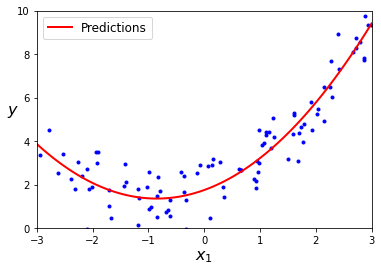

In [211]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.legend(loc="upper left", fontsize=12)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [212]:
from sklearn.model_selection import train_test_split

In [213]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
376,4.078161,38.956165
85,2.683485,48.300653
959,6.920145,28.348770
786,5.484125,39.818396
108,2.861985,63.468384
47,2.218826,61.093235
752,5.333573,39.769431
301,3.785787,54.865202
349,3.985364,41.782577
588,4.733696,44.207921


In [214]:
X = df.drop('Manufacturing Cost', axis=1)
y = df['Manufacturing Cost']

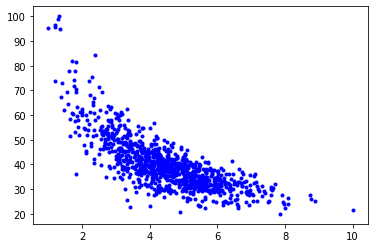

In [215]:
plt.plot(X,y,'b.')

#Modelo linear

In [216]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((800, 1), (200, 1), (800,), (200,))

In [218]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

y_pred_lin = linear_reg.predict(X_test)

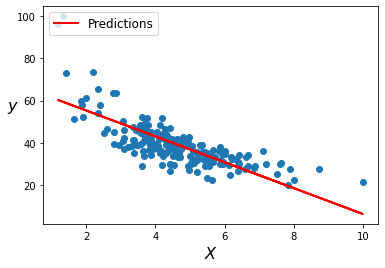

In [219]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_lin, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.legend(loc="upper left", fontsize=12);

In [220]:
linear_reg.coef_, linear_reg.intercept_

(array([-6.12396253]), 67.51699929483895)

##Formula Modelo Linear
$y = -6.14X + 67.59 + noise$

In [221]:
MAE_lin = metrics.mean_absolute_error(y_test, y_pred_lin)
print('Error medio Absoluto (MAE):', MAE_lin)

RMSE_lin = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin))
print('Root Mean Squared Error:', RMSE_lin)

RSQR_lin = r2_score(y_test, y_pred_lin)
print('r2_score', RSQR_lin)

Error medio Absoluto (MAE): 4.8901661963170975
Root Mean Squared Error: 7.023460530219433
r2_score 0.5526895076238993


In [222]:
results = pd.DataFrame([['Linear', MAE_lin, RMSE_lin, RSQR_lin]], columns = ['Model', 'MAE', 'RMSE', 'R2 Score'])

#Modelo Polinomial

In [223]:
from sklearn.preprocessing import PolynomialFeatures

In [224]:
#polinomial
poly_reg = PolynomialFeatures(degree = 2 , include_bias=False)
X_poly = poly_reg.fit_transform(X_train)

lin_poly_reg = LinearRegression(fit_intercept=True)
lin_poly_reg.fit(X_poly, y_train)

y_pred = lin_poly_reg.predict(poly_reg.fit_transform(X_test))

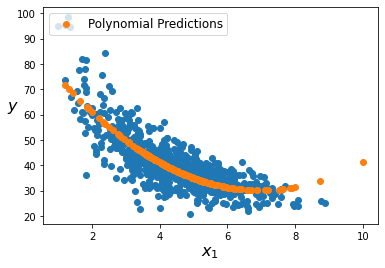

In [225]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_pred, label="Polynomial Predictions")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.legend(loc="upper left", fontsize=12)

In [226]:
lin_poly_reg.coef_, lin_poly_reg.intercept_

(array([-17.35377809,   1.24345115]), 90.69281709517362)

##Formula Modelo Polinomial
$y = -17.35X + 1.24 + noise$

In [227]:
MAE_poly = metrics.mean_absolute_error(y_test, y_pred)
print('Error medio Absoluto (MAE):', MAE_poly)

RMSE_poly = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', RMSE_poly)

RSQR_poly = r2_score(y_test, y_pred)
print('r2_score', RSQR_poly)

Error medio Absoluto (MAE): 4.499477736770161
Root Mean Squared Error: 6.14594886001069
r2_score 0.657480992082238


In [228]:
poly_results = pd.DataFrame([['Polynomial', MAE_poly, RMSE_poly, RSQR_poly]], columns = ['Model', 'MAE', 'RMSE', 'R2 Score'])

results = results.append(poly_results, ignore_index=True)

# Ridge & Lasso

In [229]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [230]:
ridge_reg = Ridge(alpha=0.001)
ridge_reg.fit(X_train, y_train)

y_pred_rr= ridge_reg.predict(X_test)

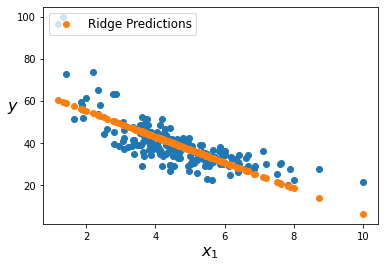

In [231]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_rr, label="Ridge Predictions")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.legend(loc="upper left", fontsize=12)

In [232]:
ridge_reg.coef_, ridge_reg.intercept_

(array([-6.12395814]), 67.51697984085757)

##Formula Modelo Ridge
$y = -6.12X + 67.51 + noise$

In [233]:
MAE_ridge = metrics.mean_absolute_error(y_test, y_pred_rr)
print('Error medio Absoluto (MAE):', MAE_ridge)

RMSE_ridge = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rr))
print('Root Mean Squared Error:', RMSE_ridge)

RSQR_ridge = r2_score(y_test, y_pred_rr)
print('r2_score', RSQR_ridge)

Error medio Absoluto (MAE): 4.890165015713815
Root Mean Squared Error: 7.023460033901902
r2_score 0.5526895708428868


In [234]:
ridge_results = pd.DataFrame([['Ridge', MAE_ridge, RMSE_ridge, RSQR_ridge]], columns = ['Model', 'MAE', 'RMSE', 'R2 Score'])

results = results.append(ridge_results, ignore_index=True)

In [235]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

y_pred_lasso= lasso_reg.predict(X_test)

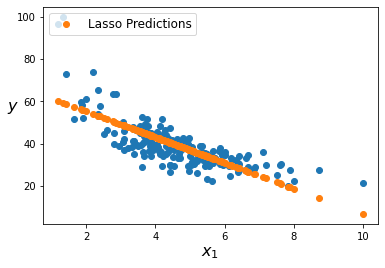

In [236]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_lasso, label="Lasso Predictions")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.legend(loc="upper left", fontsize=12)

In [237]:
lasso_reg.coef_, lasso_reg.intercept_

(array([-6.06669165]), 67.26286324853488)

##Formula Modelo Lasso
$y = -6.06X + 67.26 + noise$

In [238]:
MAE_lasso = metrics.mean_absolute_error(y_test, y_pred_lasso)
print('Error medio Absoluto (MAE):', MAE_lasso)

RMSE_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))
print('Root Mean Squared Error:', RMSE_lasso)

RSQR_lasso = r2_score(y_test, y_pred_lasso)
print('r2_score', RSQR_lasso)

Error medio Absoluto (MAE): 4.875013079035151
Root Mean Squared Error: 7.017427434275082
r2_score 0.5534576497780898


In [239]:
lasso_results = pd.DataFrame([['lasso', MAE_lasso, RMSE_lasso, RSQR_lasso]], columns = ['Model', 'MAE', 'RMSE', 'R2 Score'])

results = results.append(lasso_results, ignore_index=True)

In [240]:
results

,Model,MAE,RMSE,R2 Score
0,Linear,4.890166,7.023461,0.552690
1,Polynomial,4.499478,6.145949,0.657481
2,Ridge,4.890165,7.023460,0.552690
3,lasso,4.875013,7.017427,0.553458


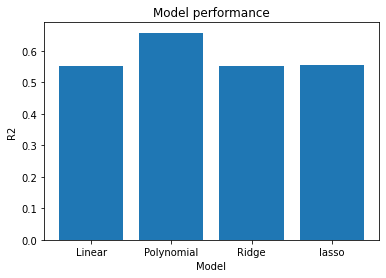

In [241]:
fig, ax = plt.subplots()

x = results["Model"]
y = results["R2 Score"]

ax.bar(x, y)
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('Model performance')
fig.show()

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [242]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13563,5411600180,20141224T000000,715000.0,4,2.50,2970,5722,2.0,0,0,...,9,2970,0,2005,0,98074,47.6134,-122.042,3940,4848
18208,2579500110,20140701T000000,2367000.0,3,2.25,3530,17450,1.0,1,3,...,9,1840,1690,1930,1993,98040,47.5358,-122.213,3530,17310
7937,2113700115,20150504T000000,369950.0,3,2.00,1520,4000,1.0,0,0,...,6,800,720,1943,0,98106,47.5310,-122.351,1430,4000
13960,924069210,20140603T000000,695000.0,4,2.50,2961,12146,2.0,0,0,...,9,2961,0,1998,0,98075,47.5839,-122.052,2620,17749
10313,1021000060,20150304T000000,550500.0,2,1.50,930,7400,1.0,0,2,...,7,830,100,1909,0,98116,47.5691,-122.408,1920,4152
11247,2473440070,20150320T000000,270000.0,3,2.25,1500,7410,1.0,0,0,...,7,1500,0,1973,0,98058,47.4597,-122.162,1750,7990
4588,104530110,20141008T000000,268000.0,3,2.50,1850,6676,2.0,0,0,...,7,1850,0,1986,0,98023,47.3103,-122.360,1700,6663
6770,1336800010,20140613T000000,1335000.0,5,2.25,4200,5800,2.5,0,0,...,9,2910,1290,1906,0,98112,47.6284,-122.312,3060,5800
9884,7183000060,20150325T000000,260000.0,4,2.50,2360,9647,1.0,0,2,...,8,1530,830,1964,0,98003,47.3367,-122.332,2580,9680
4525,1839500115,20140712T000000,320000.0,4,1.50,2220,6811,1.0,0,0,...,7,1270,950,1961,0,98056,47.5059,-122.193,1800,7350


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [244]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [245]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)

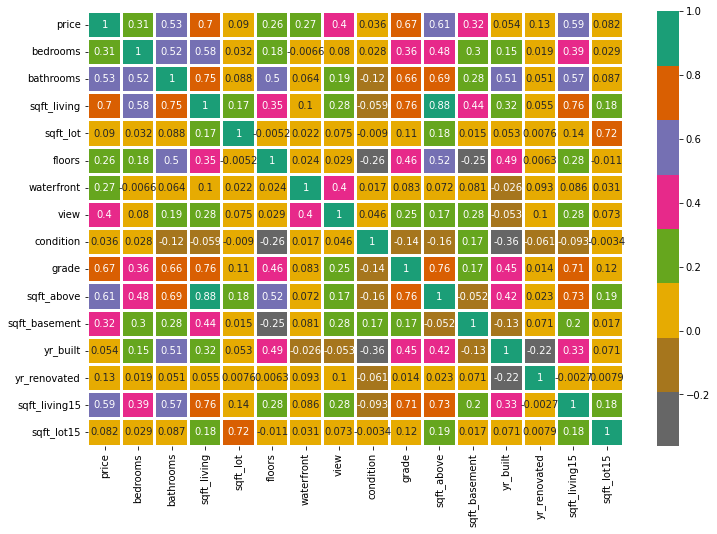

In [246]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [247]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [248]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [249]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

y_pred_lin = linear_reg.predict(X_test)

In [252]:
linear_reg.coef_, linear_reg.intercept_

(array([[-3.82008048e+04,  4.14661380e+04,  1.07992584e+02,
          1.71356997e-02,  3.16916913e+04,  5.52691023e+05,
          4.12493228e+04,  2.12221443e+04,  1.19493216e+05,
          4.77750271e+01,  6.02175565e+01, -3.55090216e+03,
          1.32602215e+01,  2.90059284e+01, -5.48132603e-01]]),
 array([6151359.2627409]))

In [253]:
MAE_lin = metrics.mean_absolute_error(y_test, y_pred_lin)
print('Error medio Absoluto (MAE):', MAE_lin)

RMSE_lin = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin))
print('Root Mean Squared Error:', RMSE_lin)

RSQR_lin = r2_score(y_test, y_pred_lin)
print('r2_score', RSQR_lin)

Error medio Absoluto (MAE): 137480.1388273178
Root Mean Squared Error: 232133.3676240749
r2_score 0.6579723205007814


In [257]:
results = pd.DataFrame([['Linear', MAE_lin, RMSE_lin, RSQR_lin]], columns = ['Model', 'MAE', 'RMSE', 'R2 Score'])

In [254]:
poly_reg = PolynomialFeatures(degree = 2 , include_bias=False)
X_poly = poly_reg.fit_transform(X_train)

lin_poly_reg = LinearRegression(fit_intercept=True)
lin_poly_reg.fit(X_poly, y_train)

y_pred = lin_poly_reg.predict(poly_reg.fit_transform(X_test))

In [ ]:
lin_poly_reg.coef_, lin_poly_reg.intercept_

In [256]:
MAE_poly = metrics.mean_absolute_error(y_test, y_pred)
print('Error medio Absoluto (MAE):', MAE_poly)

RMSE_poly = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', RMSE_poly)

RSQR_poly = r2_score(y_test, y_pred)
print('r2_score', RSQR_poly)

Error medio Absoluto (MAE): 121314.06948173394
Root Mean Squared Error: 186261.28575138954
r2_score 0.7797929072570198


In [258]:
poly_results = pd.DataFrame([['Polynomial', MAE_poly, RMSE_poly, RSQR_poly]], columns = ['Model', 'MAE', 'RMSE', 'R2 Score'])

results = results.append(poly_results, ignore_index=True)

In [260]:
ridge_reg = Ridge(alpha=0.01)
ridge_reg.fit(X_train, y_train)

y_pred_rr= ridge_reg.predict(X_test)

In [261]:
MAE_ridge = metrics.mean_absolute_error(y_test, y_pred_rr)
print('Error medio Absoluto (MAE):', MAE_ridge)

RMSE_ridge = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rr))
print('Root Mean Squared Error:', RMSE_ridge)

RSQR_ridge = r2_score(y_test, y_pred_rr)
print('r2_score', RSQR_ridge)

Error medio Absoluto (MAE): 137480.24873801804
Root Mean Squared Error: 232133.68672887486
r2_score 0.6579713801555791


In [262]:
ridge_results = pd.DataFrame([['Ridge', MAE_ridge, RMSE_ridge, RSQR_ridge]], columns = ['Model', 'MAE', 'RMSE', 'R2 Score'])

results = results.append(ridge_results, ignore_index=True)

In [264]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

y_pred_lasso= lasso_reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.053e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [266]:
MAE_lasso = metrics.mean_absolute_error(y_test, y_pred_lasso)
print('Error medio Absoluto (MAE):', MAE_lasso)

RMSE_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))
print('Root Mean Squared Error:', RMSE_lasso)

RSQR_lasso = r2_score(y_test, y_pred_lasso)
print('r2_score', RSQR_lasso)

Error medio Absoluto (MAE): 137480.14315454173
Root Mean Squared Error: 232133.37922044084
r2_score 0.6579722863283719


In [267]:
lasso_results = pd.DataFrame([['lasso', MAE_lasso, RMSE_lasso, RSQR_lasso]], columns = ['Model', 'MAE', 'RMSE', 'R2 Score'])

results = results.append(lasso_results, ignore_index=True)

In [269]:
results

,Model,MAE,RMSE,R2 Score
0,Linear,137480.138827,232133.367624,0.657972
1,Polynomial,121314.069482,186261.285751,0.779793
2,Ridge,137480.248738,232133.686729,0.657971
3,lasso,137480.143155,232133.379220,0.657972


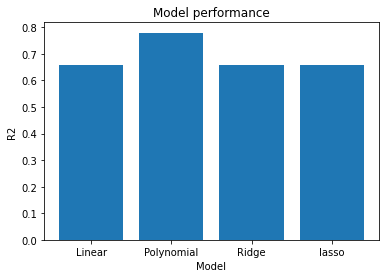

In [268]:
fig, ax = plt.subplots()

x = results["Model"]
y = results["R2 Score"]

ax.bar(x, y)
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('Model performance')
fig.show()